In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

df = pd.read_csv("../../datasets/kc_house_price.txt", sep=',', header=0, index_col=None)

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


##### Data preprocessing (remove NaN, see distribution of data,...)

- Extract needed features 

In [4]:
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [5]:
features = [
    "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot" ,"floors" ,"waterfront" ,"view", "condition", "grade", "sqft_above","sqft_basement",
]

calculate_df = df.loc[:, features]
calculate_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0
21595,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0


- Remove NaN

In [6]:

for col_name in features:
  calculate_df.loc[:, col_name] = pd.to_numeric(calculate_df.loc[:, col_name], errors='coerce')

calculate_df.dropna(inplace=True)
calculate_df

/tmp/ipykernel_8492/157033219.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  calculate_df.loc[:, col_name] = pd.to_numeric(calculate_df.loc[:, col_name], errors='coerce')


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,3,8,1180,130.0
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0


- Extract X and y

In [7]:
price_col = calculate_df['price']
features_df = calculate_df.drop('price', axis=1)

X = features_df.to_numpy()
y = price_col.to_numpy()

X, y


(array([[3.00e+00, 2.25e+00, 2.57e+03, ..., 7.00e+00, 2.17e+03, 4.00e+02],
        [2.00e+00, 1.00e+00, 7.70e+02, ..., 6.00e+00, 7.70e+02, 0.00e+00],
        [4.00e+00, 3.00e+00, 1.96e+03, ..., 7.00e+00, 1.05e+03, 9.10e+02],
        ...,
        [4.00e+00, 2.50e+00, 2.31e+03, ..., 8.00e+00, 2.31e+03, 0.00e+00],
        [2.00e+00, 7.50e-01, 1.02e+03, ..., 7.00e+00, 1.02e+03, 0.00e+00],
        [2.00e+00, 7.50e-01, 1.02e+03, ..., 7.00e+00, 1.02e+03, 0.00e+00]]),
 array([538000., 180000., 604000., ..., 400000., 402101., 325000.]))

- Calculate solution

In [8]:
X_bar = np.insert(X, 0, values=1, axis=1)

A = X_bar.T @ X_bar
b = X_bar.T @ y
pinv_A = np.linalg.pinv(A)

w = pinv_A @ b
w

array([-6.99114913e+05, -3.59502778e+04, -1.55343189e+04,  1.38525713e+02,
       -3.52944929e-01, -2.65907510e+03,  6.04034853e+05,  6.02973866e+04,
        5.47462192e+04,  1.02772006e+05,  5.53725180e+01,  8.25740144e+01])

- Display data onto graph

array([[1.00e+00, 3.00e+00, 2.25e+00, ..., 7.00e+00, 2.17e+03, 4.00e+02],
       [1.00e+00, 2.00e+00, 1.00e+00, ..., 6.00e+00, 7.70e+02, 0.00e+00],
       [1.00e+00, 4.00e+00, 3.00e+00, ..., 7.00e+00, 1.05e+03, 9.10e+02],
       ...,
       [1.00e+00, 4.00e+00, 2.50e+00, ..., 8.00e+00, 2.31e+03, 0.00e+00],
       [1.00e+00, 2.00e+00, 7.50e-01, ..., 7.00e+00, 1.02e+03, 0.00e+00],
       [1.00e+00, 2.00e+00, 7.50e-01, ..., 7.00e+00, 1.02e+03, 0.00e+00]])

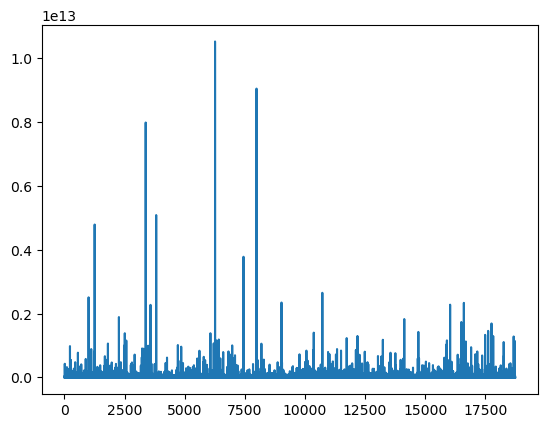

In [33]:
y_pred = X_bar @ w
e = 0.5 * (y - y_pred) ** 2

mape = np.sum(np.abs(1 - y_pred / y)) / len(y)
mse = np.sum(e) / len(e)

plt.plot(e)
X_bar


- Test against library

In [10]:
from sklearn import linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(X_bar, y)

# Compare two results
print('Solution found by scikit-learn:\n', regr.coef_ )
print('Solution found by self:\n', w.T)

Solution found by scikit-learn:
 [-6.99114924e+05 -3.59502773e+04 -1.55343190e+04  1.38332652e+02
 -3.52944927e-01 -2.65907470e+03  6.04034854e+05  6.02973864e+04
  5.47462201e+04  1.02772007e+05  5.55655779e+01  8.27670746e+01]
Solution found by self:
 [-6.99114913e+05 -3.59502778e+04 -1.55343189e+04  1.38525713e+02
 -3.52944929e-01 -2.65907510e+03  6.04034853e+05  6.02973866e+04
  5.47462192e+04  1.02772006e+05  5.53725180e+01  8.25740144e+01]


In [20]:
def grad(w):
    N = X_bar.shape[0]
    return 1/N * X_bar.T.dot(X_bar.dot(w) - y ) 

def cost(w):
    N = X_bar.shape[0]
    return .5/N * np.linalg.norm(y - X_bar.dot(w), 2)**2

def numerical_grad(w, cost):
    eps = 1e-5
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g 

def check_grad(w, cost, grad):
    # w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

print( 'Checking gradient...', check_grad(regr.coef_, cost, grad))

[*w.shape]

Checking gradient... False


[12]

In [31]:
def myGD(w_init, grad, learning_rate, n_iterations=1000):
    w = [w_init]
    for it in range(n_iterations):
        w_new = w[-1] - learning_rate*grad(w[-1])
        # if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
        #     break
        w.append(w_new)
    return w, it

w_init = np.random.rand(w.shape[0])
ws_gd, it_gd = myGD(w_init, grad, learning_rate=1, n_iterations=10)

ws_gd

[array([0.4359949 , 0.02592623, 0.54966248, 0.43532239, 0.4203678 ,
        0.33033482, 0.20464863, 0.61927097, 0.29965467, 0.26682728,
        0.62113383, 0.52914209]),
 array([5.33102427e+05, 1.90436436e+06, 1.27758564e+06, 1.34830865e+09,
        8.66318189e+09, 8.48645275e+05, 1.27212296e+04, 2.34479818e+05,
        1.82702400e+06, 4.37303360e+06, 1.14056226e+09, 2.07746391e+08]),
 array([-1.35598803e+14, -4.68412072e+14, -3.11743211e+14, -3.41101482e+17,
        -1.66077431e+19, -2.01764365e+14, -1.73127738e+12, -5.09383431e+13,
        -4.58762985e+14, -1.08900198e+15, -2.99182500e+17, -4.19189817e+16]),
 array([2.51790825e+23, 8.68588396e+23, 5.78284036e+23, 6.33672007e+26,
        3.16881210e+28, 3.73772357e+23, 3.22689492e+21, 9.50779561e+22,
        8.51871408e+23, 2.02187107e+24, 5.56113565e+26, 7.75584418e+25]),
 array([-4.80362336e+32, -1.65706896e+33, -1.10323599e+33, -1.20891120e+36,
        -6.04608250e+37, -7.13069626e+32, -6.15631381e+30, -1.81392082e+32,
        -1.6